# IMPORTING ALL NECESSARY LIBRARIES AND FUNCTIONS

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from google.colab import files
from glob import glob
import random
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

from keras import optimizers
from google.colab import files

# CHECKING IF THE GPU IS WORKING 

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# IMPORTING THE DATASET FROM GOOGLE DRIVE 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

train_path='/content/drive/MyDrive/train_dataset'
test_path='/content/drive/MyDrive/test_dataset'

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=.2, zoom_range=.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')
testing_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Found 4591 images belonging to 2 classes.
Found 2159 images belonging to 2 classes.


# VGG-19 MODEL
### MAKING, COMPILATION, STRUCTURE, FITTING, PROGRESS VISUALIZATION AND HEATMAP

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


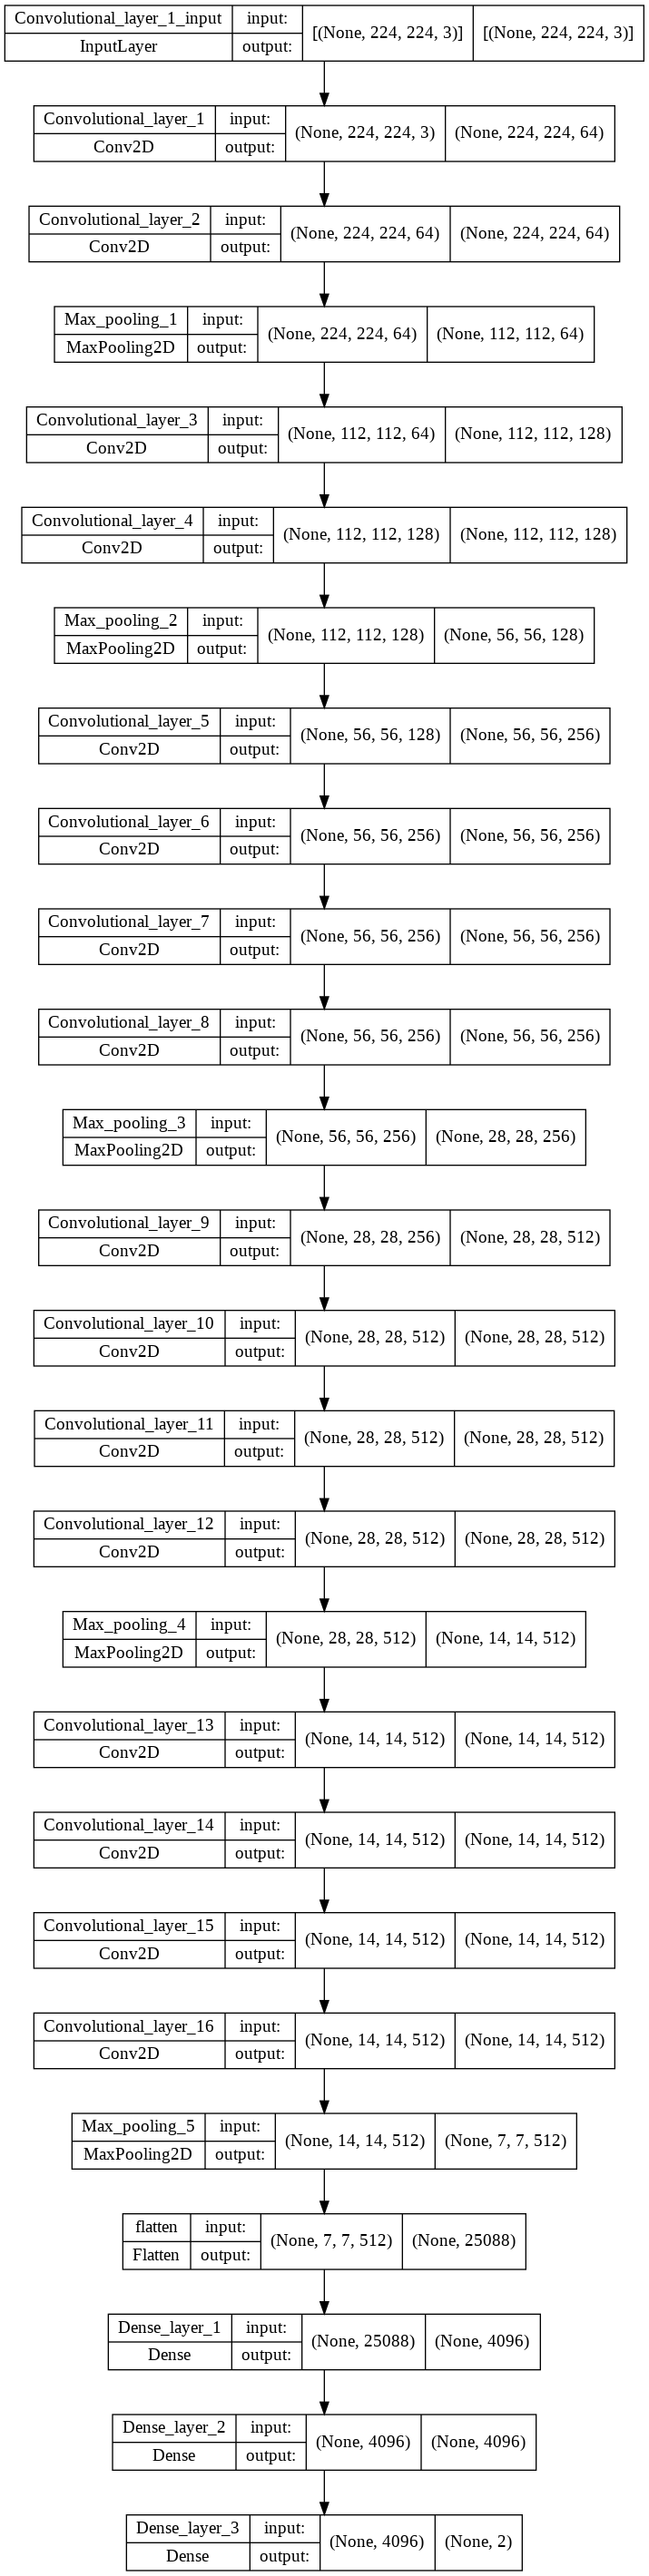

In [ ]:
model2=Sequential()

# Layer 1: Convolutional
model2.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_1',input_shape=(224,224,3)))

# Layer 2: Convolutional
model2.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_2'))

# MaxPool 1
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_1'))

# Layer 3: Convolutional
model2.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_3'))

# Layer 4: Convolutional
model2.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_4'))

# MaxPool 2
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_2'))

# Layer 5: Convolutional
model2.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_5'))

# Layer 6: Convolutional
model2.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_6'))

# Layer 7: Convolutional
model2.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_7'))

# Layer 8: Convolutional
model2.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_8'))

# MaxPool 3
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_3'))

# Layer 9: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_9'))

# Layer 10: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_10'))

# Layer 11: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_11'))

# Layer 12: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_12'))

# MaxPool 4
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_4'))

# Layer 13: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_13'))

# Layer 14: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_14'))

# Layer 15: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_15'))

# Layer 16: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_16'))

# MaxPool 5
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_5'))

# flatten
model2.add(Flatten(input_shape=[227,227,3]))
/
# Layer 17: Fully Connected
model2.add(Dense(units=4096,activation='relu',name='Dense_layer_1'))

# Layer 18: Fully Connected
model2.add(Dense(units=4096,activation='relu',name='Dense_layer_2'))

# Layer 19: Fully Connected
model2.add(Dense(units=2,activation='softmax',name='Dense_layer_3'))

# compiling the model
model2.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=.01),metrics=['accuracy'])

# printing the blueprint of the model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# fitting the alexnet model
r2=model2.fit_generator(training_set,validation_data=testing_set,epochs=32,steps_per_epoch=(len(training_set)),validation_steps=(len(testing_set)))

# keys present in the history
print(r2.history.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/32
144/144 [==============================] - 554s 3s/step - loss: 0.6929 - accuracy: 0.5023 - val_loss: 0.6939 - val_accuracy: 0.2668
Epoch 2/32
144/144 [==============================] - 202s 1s/step - loss: 0.6924 - accuracy: 0.5262 - val_loss: 0.6954 - val_accuracy: 0.2668
Epoch 3/32
144/144 [==============================] - 196s 1s/step - loss: 0.6912 - accuracy: 0.5572 - val_loss: 0.6819 - val_accuracy: 0.7332
Epoch 4/32
144/144 [==============================] - 193s 1s/step - loss: 0.6892 - accuracy: 0.5822 - val_loss: 0.6827 - val_accuracy: 0.7466
Epoch 5/32
144/144 [==============================] - 190s 1s/step - loss: 0.6848 - accuracy: 0.6617 - val_loss: 0.6761 - val_accuracy: 0.7554
Epoch 6/32
144/144 [==============================] - 190s 1s/step - loss: 0.6719 - accuracy: 0.6737 - val_loss: 0.6663 - val_accuracy: 0.7744
Epoch 7/32
144/144 [==============================] - 190s 1s/step - loss: 0.5988 - accuracy: 0.6968 - val_loss: 0.8068 - val_accuracy: 0.2839

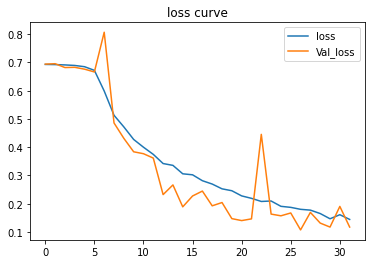

Text(0.5, 1.0, 'Accuracy Evolution')

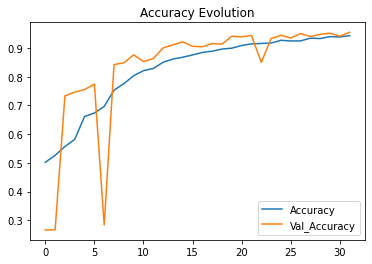

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r2.history['loss'],label='loss')
plt.plot(r2.history['val_loss'],label='Val_loss')
plt.title('loss curve')
plt.legend()
plt.show()

plt.plot(r2.history['accuracy'], label='Accuracy')
plt.plot(r2.history['val_accuracy'], label='Val_Accuracy')
plt.title('accuracy curve')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation=model2.evaluate(testing_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation=model2.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

68/68 [==============================] - 55s 805ms/step - loss: 0.1171 - accuracy: 0.9551
Test Accuracy: 95.51%
144/144 [==============================] - 121s 840ms/step - loss: 0.1201 - accuracy: 0.9551
Train Accuracy: 95.51%
